In [1]:
import pandas as pd
import requests
from spotify_config import spotify_headers
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as offline

offline.init_notebook_mode(connected=True)

In [8]:
df = pd.read_csv("top_100_songs_decades_.csv").drop(columns = ["Unnamed: 0"])

In [9]:
df.head()

,year,artist,song,track_id,acousticness,analysis_url,danceability,duration_ms,energy,error,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,2010,Ke$ha,TiK ToK,5OMwQFBcte0aWFJFqrr5oj,0.07460,https://api.spotify.com/v1/audio-analysis/5OMw...,0.755,199693.0,0.832,NaN,...,0.2910,-2.741,0.0,0.1160,120.032,4.0,https://api.spotify.com/v1/tracks/5OMwQFBcte0a...,audio_features,spotify:track:5OMwQFBcte0aWFJFqrr5oj,0.735
1,2010,Lady Antebellum,Need You Now,11EX5yhxr9Ihl3IN1asrfK,0.09270,https://api.spotify.com/v1/audio-analysis/11EX...,0.587,277573.0,0.622,NaN,...,0.2000,-5.535,1.0,0.0303,107.943,4.0,https://api.spotify.com/v1/tracks/11EX5yhxr9Ih...,audio_features,spotify:track:11EX5yhxr9Ihl3IN1asrfK,0.231
2,2010,Train,Hey Soul Sister,4HlFJV71xXKIGcU3kRyttv,0.18500,https://api.spotify.com/v1/audio-analysis/4HlF...,0.673,216773.0,0.886,NaN,...,0.0826,-4.440,0.0,0.0431,97.012,4.0,https://api.spotify.com/v1/tracks/4HlFJV71xXKI...,audio_features,spotify:track:4HlFJV71xXKIGcU3kRyttv,0.795
3,2010,Katy Perry Featuring Snoop Dogg,California Gurls,6tS3XVuOyu10897O3ae7bi,0.00446,https://api.spotify.com/v1/audio-analysis/6tS3...,0.791,234653.0,0.754,NaN,...,0.1630,-3.729,1.0,0.0569,125.014,4.0,https://api.spotify.com/v1/tracks/6tS3XVuOyu10...,audio_features,spotify:track:6tS3XVuOyu10897O3ae7bi,0.425
4,2010,Usher Featuring will.i.am,OMG,1bM50INir8voAkVoKuvEUI,0.19800,https://api.spotify.com/v1/audio-analysis/1bM5...,0.781,269493.0,0.745,NaN,...,0.3600,-5.810,0.0,0.0332,129.998,4.0,https://api.spotify.com/v1/tracks/1bM50INir8vo...,audio_features,spotify:track:1bM50INir8voAkVoKuvEUI,0.326


In [14]:
import seaborn as sns
sns.set()

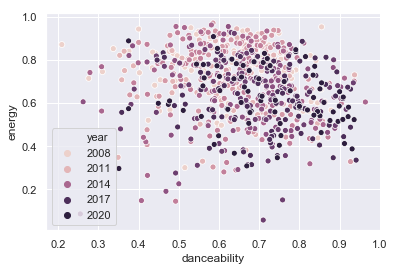

In [15]:
sns.scatterplot(x=df['danceability'],y=df['energy'],hue=df['year'])

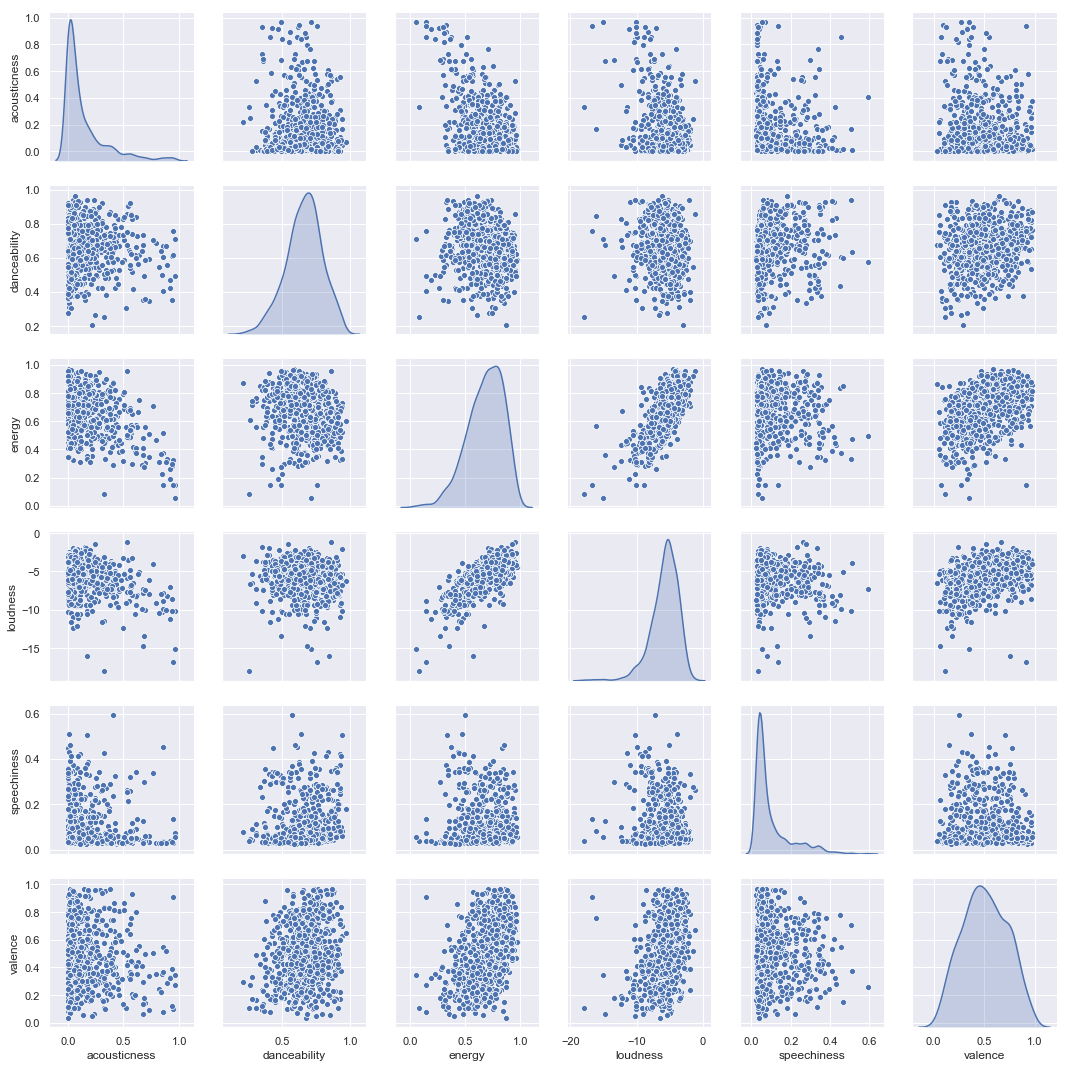

In [19]:
cols = ['acousticness', 'danceability', 'energy', 'loudness', 'speechiness', 'valence']
# sns.scatterplot(x=merged['danceability'],y=merged['energy'],hue=merged['year'])
sns.pairplot(data=df[cols].dropna(), diag_kind='kde')

In [39]:
year = 2010
artist = "Drake"

data = []

while year < 2019:
#     &(df['artist']==artist)
    # filter criteria to plot
    new_df = df[(df['year']==year)]
    
    trace = go.Scatter3d(
        x=new_df['danceability'],
        y=new_df['energy'],
        z=new_df['loudness'],
        mode='markers',
        marker=dict(
            size=5,
            colorscale="Viridis",
            line=dict(
                width=0.1),
            opacity=.5
        ),
        name=year,
        text=[f'Title: {song}<br>Artist: {artist}' for song,artist in zip(new_df['song'],new_df['artist'])]
    )
    data.append(trace)
    year+=1

layout = go.Layout(
    title="Top 100 Features",
    xaxis=dict(title='Date'),
    yaxis=dict(title='placeholder'),
    margin=dict(
        l=0,
        r=0,
        b=15,
        t=20
    )
)


fig = go.Figure(data=data, layout=layout)

offline.iplot(fig)

In [29]:
df[df['year']==2018]

,year,artist,song,track_id,acousticness,analysis_url,danceability,duration_ms,energy,error,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
705,2018,Drake,God's Plan,6DCZcSspjsKoFjzjrWoCdn,0.033200,https://api.spotify.com/v1/audio-analysis/6DCZ...,0.754,198973.0,0.449,NaN,...,0.5520,-9.211,1.0,0.1090,77.169,4.0,https://api.spotify.com/v1/tracks/6DCZcSspjsKo...,audio_features,spotify:track:6DCZcSspjsKoFjzjrWoCdn,0.3570
706,2018,Ed Sheeran,Perfect,0tgVpDi06FyKpA1z0VMD4v,0.163000,https://api.spotify.com/v1/audio-analysis/0tgV...,0.599,263400.0,0.448,NaN,...,0.1060,-6.312,1.0,0.0232,95.050,3.0,https://api.spotify.com/v1/tracks/0tgVpDi06FyK...,audio_features,spotify:track:0tgVpDi06FyKpA1z0VMD4v,0.1680
707,2018,Bebe Rexha & Florida Georgia Line,Meant To Be,7iDa6hUg2VgEL1o1HjmfBn,0.047000,https://api.spotify.com/v1/audio-analysis/7iDa...,0.643,163870.0,0.783,NaN,...,0.0830,-6.458,1.0,0.0856,154.084,4.0,https://api.spotify.com/v1/tracks/7iDa6hUg2VgE...,audio_features,spotify:track:7iDa6hUg2VgEL1o1HjmfBn,0.5790
708,2018,Post Malone Featuring Ty Dolla $ign,Psycho,3swc6WTsr7rl9DqQKQA55C,0.580000,https://api.spotify.com/v1/audio-analysis/3swc...,0.739,221440.0,0.559,NaN,...,0.1120,-8.011,1.0,0.1170,140.124,4.0,https://api.spotify.com/v1/tracks/3swc6WTsr7rl...,audio_features,spotify:track:3swc6WTsr7rl9DqQKQA55C,0.4390
709,2018,Drake,In My Feelings,2G7V7zsVDxg1yRsu7Ew9RJ,0.058900,https://api.spotify.com/v1/audio-analysis/2G7V...,0.835,217925.0,0.626,NaN,...,0.3960,-5.833,1.0,0.1250,91.030,4.0,https://api.spotify.com/v1/tracks/2G7V7zsVDxg1...,audio_features,spotify:track:2G7V7zsVDxg1yRsu7Ew9RJ,0.3500
710,2018,Maroon 5 Featuring Cardi B,Girls Like You,6FRLCMO5TUHTexlWo8ym1W,0.568000,https://api.spotify.com/v1/audio-analysis/6FRL...,0.851,235545.0,0.541,NaN,...,0.1300,-6.825,1.0,0.0505,124.959,4.0,https://api.spotify.com/v1/tracks/6FRLCMO5TUHT...,audio_features,spotify:track:6FRLCMO5TUHTexlWo8ym1W,0.4480
711,2018,Drake,Nice For What,3CA9pLiwRIGtUBiMjbZmRw,0.089100,https://api.spotify.com/v1/audio-analysis/3CA9...,0.586,210747.0,0.909,NaN,...,0.1190,-6.474,1.0,0.0705,93.394,4.0,https://api.spotify.com/v1/tracks/3CA9pLiwRIGt...,audio_features,spotify:track:3CA9pLiwRIGtUBiMjbZmRw,0.7570
712,2018,Juice WRLD,Lucid Dreams,285pBltuF7vW8TeWk8hdRR,0.349000,https://api.spotify.com/v1/audio-analysis/285p...,0.511,239836.0,0.566,NaN,...,0.3400,-7.230,0.0,0.2000,83.903,4.0,https://api.spotify.com/v1/tracks/285pBltuF7vW...,audio_features,spotify:track:285pBltuF7vW8TeWk8hdRR,0.2180
713,2018,Post Malone,Better Now,7dt6x5M1jzdTEt8oCbisTK,0.354000,https://api.spotify.com/v1/audio-analysis/7dt6...,0.680,231267.0,0.563,NaN,...,0.1360,-5.843,1.0,0.0454,145.028,4.0,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,audio_features,spotify:track:7dt6x5M1jzdTEt8oCbisTK,0.3740
714,2018,Bruno Mars & Cardi B,Finesse,0QIjsbm2fh1cJ45XO9eGqq,0.003810,https://api.spotify.com/v1/audio-analysis/0QIj...,0.800,204665.0,0.578,NaN,...,0.3590,-5.144,0.0,0.0485,143.010,4.0,https://api.spotify.com/v1/tracks/0QIjsbm2fh1c...,audio_features,spotify:track:0QIjsbm2fh1cJ45XO9eGqq,0.3670


In [38]:
# top 5 artists of the decade.
df['artist'].value_counts()[:5]

Drake           15
Taylor Swift    13
Rihanna         10
Maroon 5         8
Adele            8
Name: artist, dtype: int64